In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [124]:
# import the data (500 data with 2 features for now)
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
X, y

(array([[-1.72495958e+00,  5.11495754e-01],
        [-5.28423715e-01, -6.56566932e-01],
        [-1.47146387e+00,  6.35155778e-01],
        [-5.71931749e-01,  2.20315917e+00],
        [-1.44783200e+00,  7.49921713e-01],
        [-2.17851883e+00,  3.40078982e-01],
        [-1.59144132e+00, -1.52804708e+00],
        [ 1.11527701e+00, -2.31864595e+00],
        [-5.68209886e-01,  1.34546717e+00],
        [-4.81013584e-01,  2.64767668e+00],
        [ 4.82286744e-01,  1.39915014e+00],
        [-1.40434156e+00, -1.33459164e+00],
        [-1.33268767e+00,  9.47258402e-01],
        [ 2.14839962e-01, -7.10774474e-01],
        [-3.45014080e-01,  1.37557778e+00],
        [-3.13798361e+00, -3.17589661e-01],
        [-2.32872036e-01, -7.07671147e-01],
        [-1.77982232e+00,  4.53845160e-01],
        [-4.40521725e-01,  1.03077846e+00],
        [ 1.53755611e+00,  2.06163983e-01],
        [ 2.30603641e+00, -1.24779933e+00],
        [ 2.20589265e+00, -8.73560592e-02],
        [-3.66283210e-01, -4.843

In [125]:
# let's see data in pandas data frame
df = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label": y})
df

,X0,X1,label
0,-1.724960,0.511496,0
1,-0.528424,-0.656567,0
2,-1.471464,0.635156,0
3,-0.571932,2.203159,1
4,-1.447832,0.749922,0
...,...,...,...
495,-1.478401,0.697674,0
496,-0.490660,0.645550,1
497,0.048762,1.632666,0
498,1.712280,0.441076,1


In [126]:
# train test spilit of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# let's see the sape of our data
X_train.shape, y_train.shape

((400, 2), (400,))

<function matplotlib.pyplot.show(close=None, block=None)>

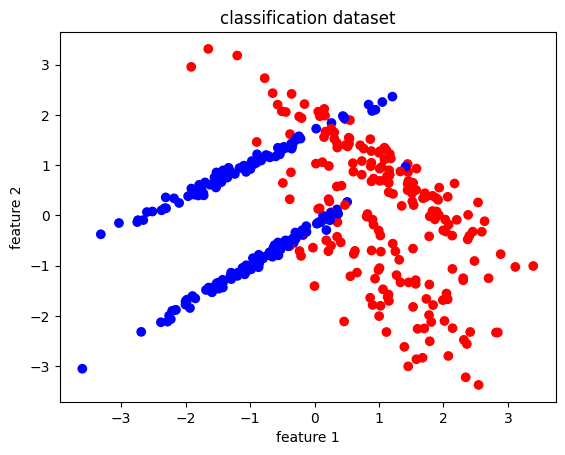

In [128]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="bwr")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("classification dataset")
plt.show

In [129]:
# Build a model

#set random seed
tf.random.set_seed(42)

# Let's create a model using sequential api
model = tf.keras.Sequential([
    tf.keras.layers.Dense(80, activation="relu"),
    tf.keras.layers.Dense(80, activation="relu"),
    tf.keras.layers.Dense(80, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the mdoel
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(lr=0.0001),
             metrics=['accuracy'])

# fit the model
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 0.6347 - accuracy: 0.7775
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.8900
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8925
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2621 - accuracy: 0.8925
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2425 - accuracy: 0.8975
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2344 - accuracy: 0.9000
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2254 - accuracy: 0.9050
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2212 - accuracy: 0.9100
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2191 - accuracy: 0.9075
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2172 - accuracy: 0.9075
Epoch 11/

<Axes: >

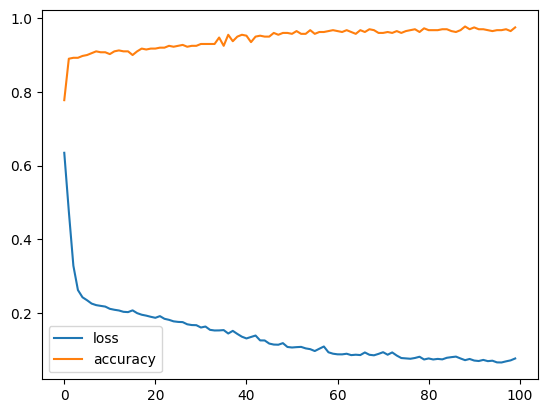

In [130]:
# let's see our training curve
pd.DataFrame(history.history).plot()

In [131]:
# lets predict the data
y_pred = model.predict(X_train)

13/13 [==============================] - 0s 2ms/step


In [132]:
# Report of experiments
"""
# exp_1
Dense (10, 1)
SGD -> epochs(100) -> loss: 6.5773 - accuracy: 0.5600

# exp_2
Dense (100, 1)
SGD -> epochs(100) -> poor results
Adam -> epochs(100) -> loss: 0.5870 - accuracy: 0.8875

# exp_3
Dense (10, 1)
Adam(lr=0.0001) -> epochs(100) -> loss: 0.3356 - accuracy: 0.8850
"""

'\n# exp_1\nDense (10, 1)\nSGD -> epochs(100) -> loss: 6.5773 - accuracy: 0.5600\n\n# exp_2\nDense (100, 1)\nSGD -> epochs(100) -> poor results\nAdam -> epochs(100) -> loss: 0.5870 - accuracy: 0.8875\n\n# exp_3\nDense (10, 1)\nAdam -> epochs(100) -> loss: 0.3356 - accuracy: 0.8850\n'

In [133]:
# plotting decision boundary for predicted data
def plot_decision_boundary(model, X, y):
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create the input data for making predictions
    X_in = np.c_[xx.ravel(), yy.ravel()]

    # Make predictions on the input data
    y_pred = model.predict(X_in)
    y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, y_pred, cmap='RdYlBu', alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()


313/313 [==============================] - 1s 2ms/step


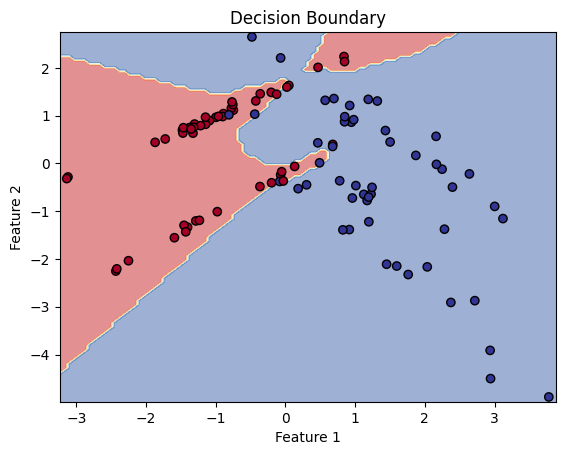

In [134]:
plot_decision_boundary(model=model, X=X_test, y=y_test)

313/313 [==============================] - 0s 1ms/step


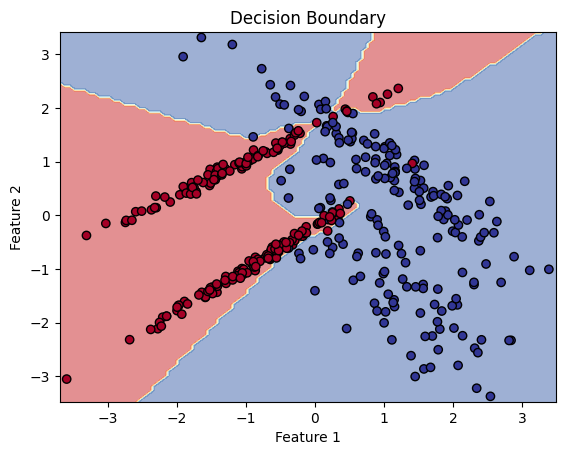

In [135]:
plot_decision_boundary(model=model, X=X_train, y=y_train)

In [136]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 80)                240       
                                                                 
 dense_42 (Dense)            (None, 80)                6480      
                                                                 
 dense_43 (Dense)            (None, 80)                6480      
                                                                 
 dense_44 (Dense)            (None, 1)                 81        
                                                                 
Total params: 13,281
Trainable params: 13,281
Non-trainable params: 0
_________________________________________________________________


In [137]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix

# make predictions
y_preds = model.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

4/4 [==============================] - 0s 2ms/step


array([[47,  3],
       [ 4, 46]])

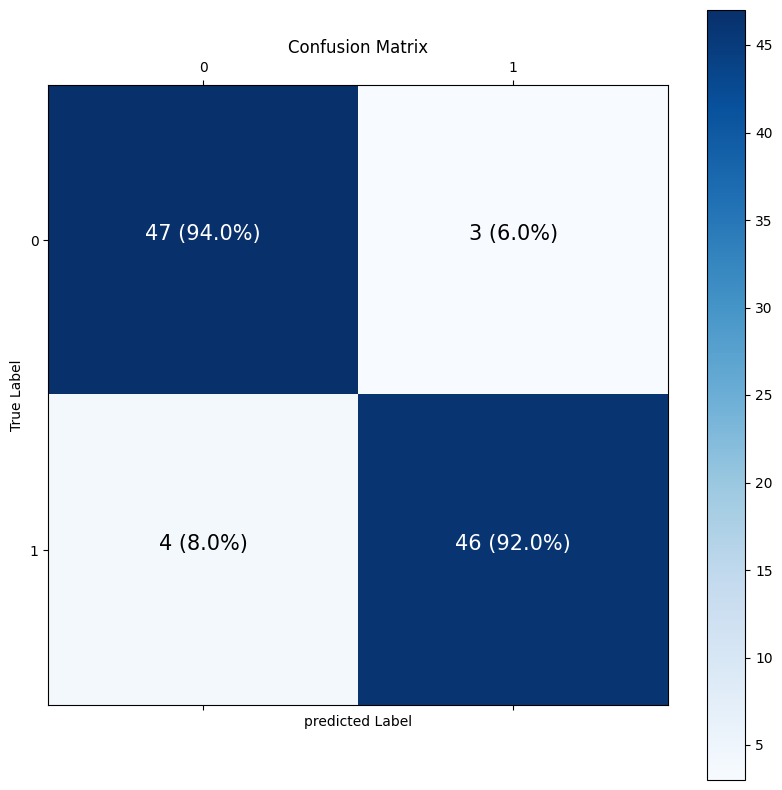

In [138]:
# Note: the confusoin matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])


# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# set threshold for different color
threshold = (cm.max() + cm.min()) / 2.

# plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)